In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

Pidicom utility, use "Add Data" function on the right(search for pidicom)

In [2]:
!pip install -qU '../input/for-pydicom/python_gdcm-3.0.14-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl' --find-links frozen_packages --no-index
!pip install -qU '../input/for-pydicom/pylibjpeg-1.4.0-py3-none-any.whl' --find-links frozen_packages --no-index

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.6)
import cv2
from os import listdir
import re
import gc
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
from tqdm import tqdm
import nibabel as nib
import random

In [4]:
path='../input/rsna-2022-cervical-spine-fracture-detection'
print(os.listdir(path))

s = pd.read_csv(path+'/train.csv')
print(s.head())

s2 = pd.read_csv(path+'/sample_submission.csv')
print(s2.head())

#id_='1.2.826.0.1.3680043.12351'
ids =os.listdir(path+'/train_images/')
id_=ids[269]
 
s.loc[s['StudyInstanceUID'] == id_]

['sample_submission.csv', 'train_images', 'train_bounding_boxes.csv', 'segmentations', 'train.csv', 'test.csv', 'test_images']
            StudyInstanceUID  patient_overall  C1  C2  C3  C4  C5  C6  C7
0   1.2.826.0.1.3680043.6200                1   1   1   0   0   0   0   0
1  1.2.826.0.1.3680043.27262                1   0   1   0   0   0   0   0
2  1.2.826.0.1.3680043.21561                1   0   1   0   0   0   0   0
3  1.2.826.0.1.3680043.12351                0   0   0   0   0   0   0   0
4   1.2.826.0.1.3680043.1363                1   0   0   0   0   1   0   0
                         row_id  fractured
0  1.2.826.0.1.3680043.10197_C1        0.5
1  1.2.826.0.1.3680043.10454_C1        0.5
2  1.2.826.0.1.3680043.10690_C1        0.5


,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
357,1.2.826.0.1.3680043.13596,1,0,0,0,0,0,1,1


In [5]:
dcms_all=os.listdir(path + '/train_images/' + id_ + '/' )
dcms=[]
for dcms_nam in dcms_all:
    dcms.append(int(dcms_nam.split('.')[0]))
dcms.sort()
all_arr=[]
for dcm in dcms:
    p = pydicom.dcmread(path + '/train_images/' + id_ + '/' + str(dcm)+'.dcm').pixel_array
    id_dcm_arr=np.array(p)
    all_arr.append(id_dcm_arr)
# resize image
    #image = np.array(cv2.resize(image, dsize=img_size))
    

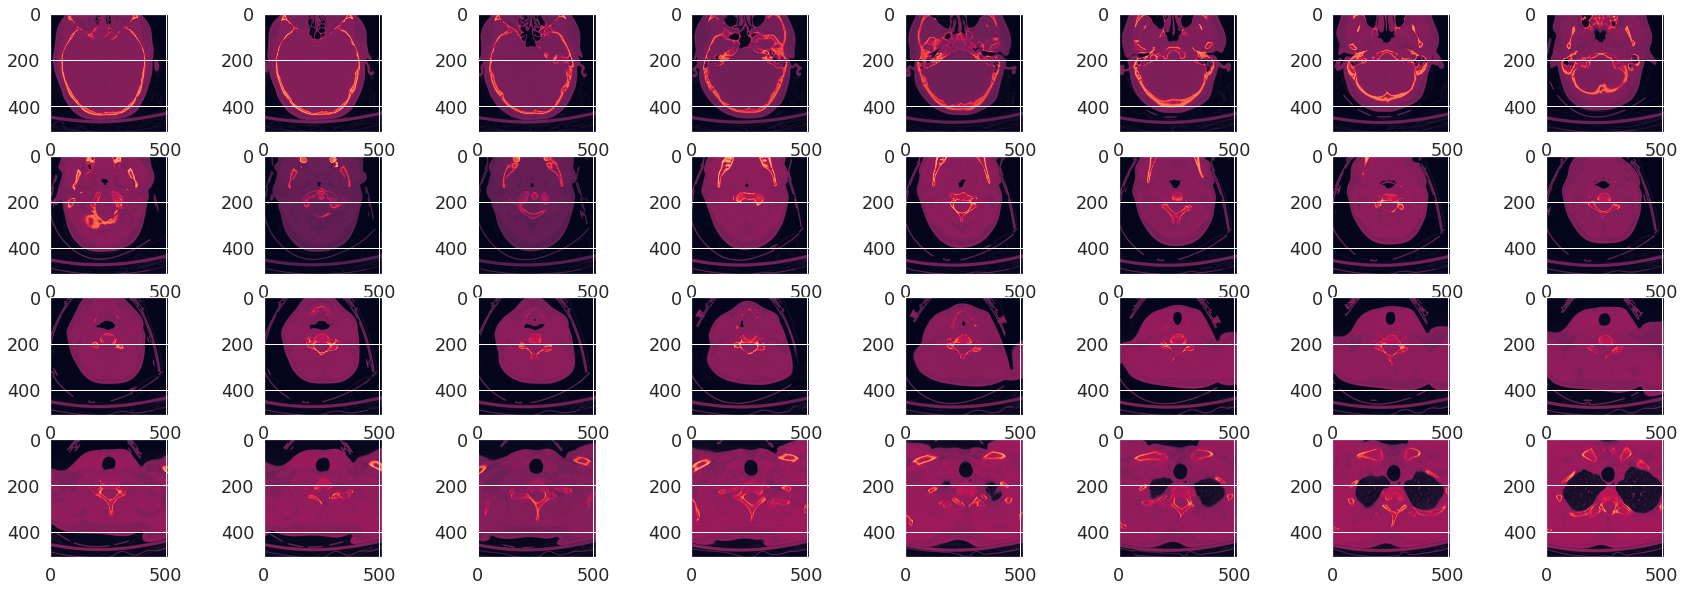

In [6]:
def plot_32(all_arr,len_dcms):
    ndcms=32
    fig, ax= plt.subplots(4,int(ndcms/4),figsize=(30,10))
    for i in range(ndcms):
        ax[int(i/int(ndcms/4))][i%int(ndcms/4)].imshow(all_arr[int(i*len_dcms/32)])
    plt.show()
    return

plot_32(all_arr,len(dcms))

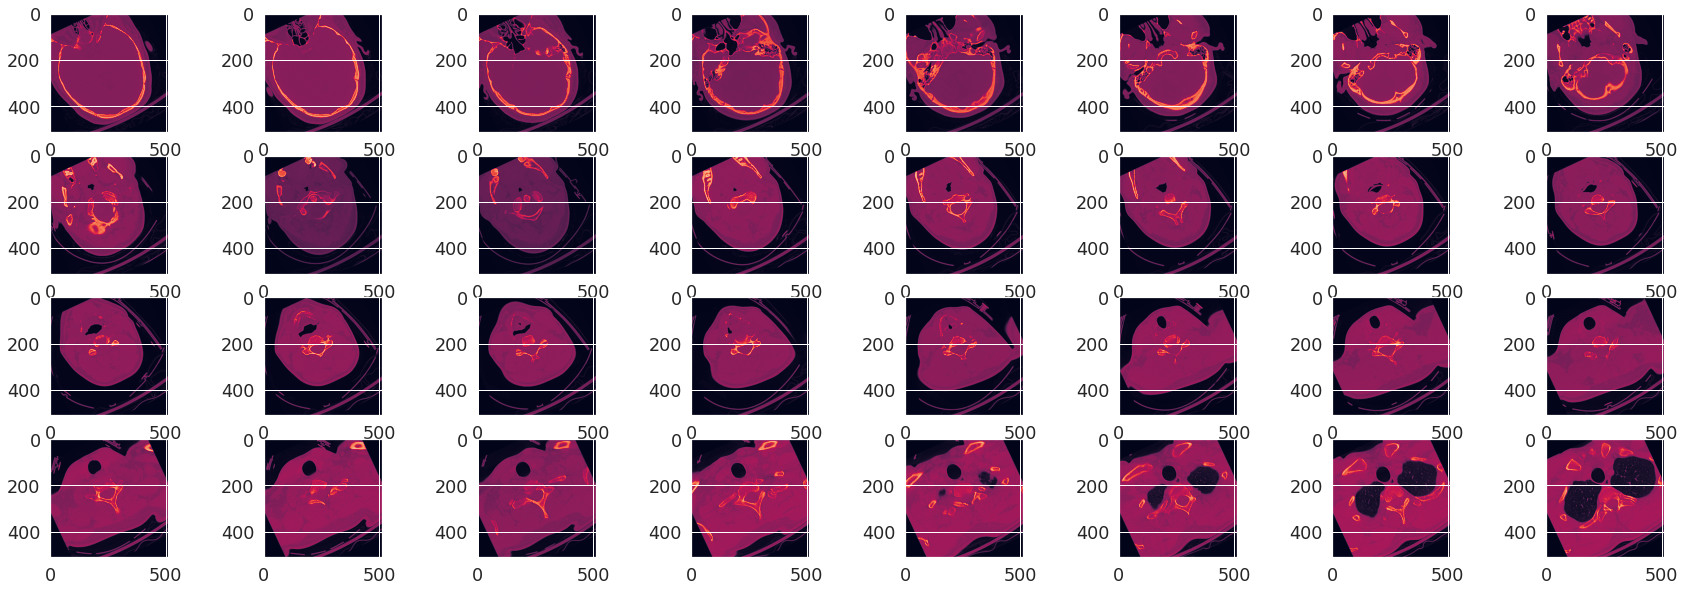

In [7]:
def rotate(image,angle):  #take a 2D numpy array image and rotate by angle
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    scale = 1

    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def rotate_3D(image_3D,angle):
    num = image_3D.shape[0]
    rotated=[]
    for i in range(num):
        rotated.append(rotate(image_3D[i],angle))
    return rotated

image=np.array(all_arr[0])
rotated = rotate(image,24)
#plt.imshow(image) 
#plt.imshow(rotated)

plot_32(rotate_3D(np.array(all_arr),25),len(dcms))

fig,ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(my_array)
plt.show()

mean, std = 0.0, 1.0


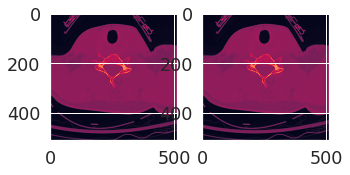

In [8]:
def norm(image):
    s = np.std(image)
    m = np.mean(image)
    t_image=np.zeros(image.shape )
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            t_image[i][j]=(image[i][j]-m)/(s)
    return t_image
#plt.imshow(normalize(all_arr[99]))
#np.mean(all_arr[77])
x=155
fig, ax= plt.subplots(1,2,figsize=(5,5))
ax[0].imshow(all_arr[x])
narr=norm(all_arr[x])
ax[1].imshow(narr) 
print("mean, std = "+str(np.mean(narr))+', '+str(np.std(narr)))
plt.show()

In [9]:
b=np.array([[31,-222.,55],[0,100,-4000]])
c=norm(b)
np.mean(c), np.std(c)

(0.0, 0.9999999999999999)